In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\projects\11_University of Patras.csv')
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%y %H:%M')

data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour

print(data)

                datetime     PM2.5  month  hour
0    2020-01-01 00:00:00  4.061770      1     0
1    2020-01-01 01:00:00  3.522560      1     1
2    2020-01-01 02:00:00  2.972290      1     2
3    2020-01-01 03:00:00  2.924620      1     3
4    2020-01-01 04:00:00  3.846485      1     4
...                  ...       ...    ...   ...
8779 2020-12-31 19:00:00  5.299247     12    19
8780 2020-12-31 20:00:00  3.286940     12    20
8781 2020-12-31 21:00:00  2.117047     12    21
8782 2020-12-31 22:00:00  3.290510     12    22
8783 2020-12-31 23:00:00  2.203778     12    23

[8784 rows x 4 columns]


# dataframes for each month, period and season

In [4]:
January = data[data['PM2.5'].gt(0) & data["month"].eq(1)]
February = data[data['PM2.5'].gt(0) & data["month"].eq(2)]
March = data[data['PM2.5'].gt(0) & data["month"].eq(3)]
April = data[data['PM2.5'].gt(0) & data["month"].eq(4)]
May = data[data['PM2.5'].gt(0) & data["month"].eq(5)]
June = data[data['PM2.5'].gt(0) & data["month"].eq(6)]
July = data[data['PM2.5'].gt(0) & data["month"].eq(7)]
August = data[data['PM2.5'].gt(0) & data["month"].eq(8)]
September = data[data['PM2.5'].gt(0) & data["month"].eq(9)]
November = data[data['PM2.5'].gt(0) & data["month"].eq(10)]
October = data[data['PM2.5'].gt(0) & data["month"].eq(11)]
December = data[data['PM2.5'].gt(0) & data["month"].eq(12)]

In [5]:
# (automating the cell above)
# t = {"January":0,"February":0,"March":0,}
# for idx in range(len(mon)):
#     val = data[data['PM2.5'].gt(0) & data['month'].eq(idx+1)]
#     t[idx] = val

# print(t[0])

In [6]:
print(January)

               datetime     PM2.5  month  hour
0   2020-01-01 00:00:00  4.061770      1     0
1   2020-01-01 01:00:00  3.522560      1     1
2   2020-01-01 02:00:00  2.972290      1     2
3   2020-01-01 03:00:00  2.924620      1     3
4   2020-01-01 04:00:00  3.846485      1     4
..                  ...       ...    ...   ...
739 2020-01-31 19:00:00  3.539710      1    19
740 2020-01-31 20:00:00  3.627490      1    20
741 2020-01-31 21:00:00  2.596040      1    21
742 2020-01-31 22:00:00  2.526880      1    22
743 2020-01-31 23:00:00  1.938373      1    23

[724 rows x 4 columns]


In [7]:
warm = data[data["month"].between(4,10)]
cold = data[data['month'].eq(11) | data["month"].eq(12)| data["month"].eq(1)| data["month"].eq(2)| data["month"].eq(3)]

In [8]:
winter = data[ data["month"].eq(12)| data["month"].eq(1)| data["month"].eq(2)]
spring = data[ data["month"].eq(3)| data["month"].eq(4)| data["month"].eq(5)]
summer = data[ data["month"].eq(6)| data["month"].eq(7)| data["month"].eq(8)]
autumn = data[ data["month"].eq(9)| data["month"].eq(10)| data["month"].eq(11)]

# functions

In [9]:
def pm(x,y,col):
    plt.figure(figsize=(10,10))
    plt.xlabel("DATEtime")
    plt.ylabel("PM concentracion (μg/m3)")

    plt.plot(x,y,color=col)

In [10]:
def statistics(x):
    print("the min value is", min(x))
    print("the max value is", max(x))
    print("the mean value is", np.mean(x))
    print("the standard deviation value is", np.std(x))

In [11]:
def bar(x,t):
    plt.figure(figsize=(10,10))
    data.groupby(x)["PM2.5"].mean().plot(kind='bar')
    plt.xlabel(x)
    plt.ylim(0, 10)
    plt.ylabel("PM(μg/m3)")
    title = "PM concentation during the"+" "+ t
    plt.title(title)

In [12]:
def seashour(x,y,t):
    plt.figure(figsize=(10,10))
    plt.ylim(0, 10)
    x.mean().plot(kind='bar', color=y)
    plt.title(t)

# DATA VISUALISATION AND STATISTICAL ANALYSIS

# daily and monthly variability

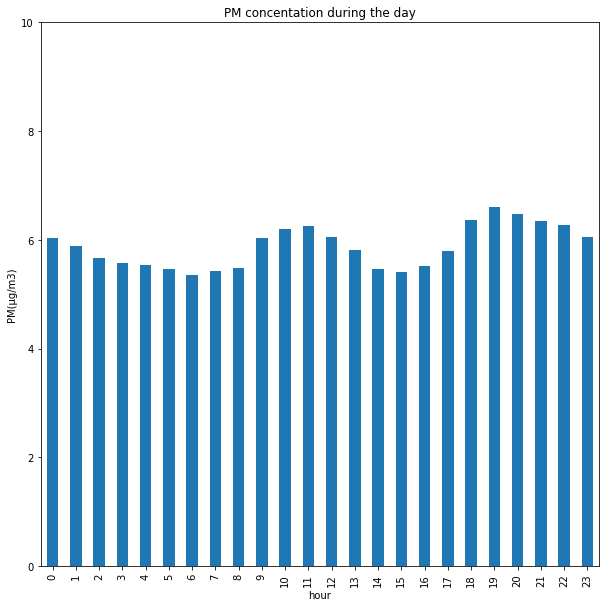

In [13]:
#PM concentration during the day
bar("hour","day")

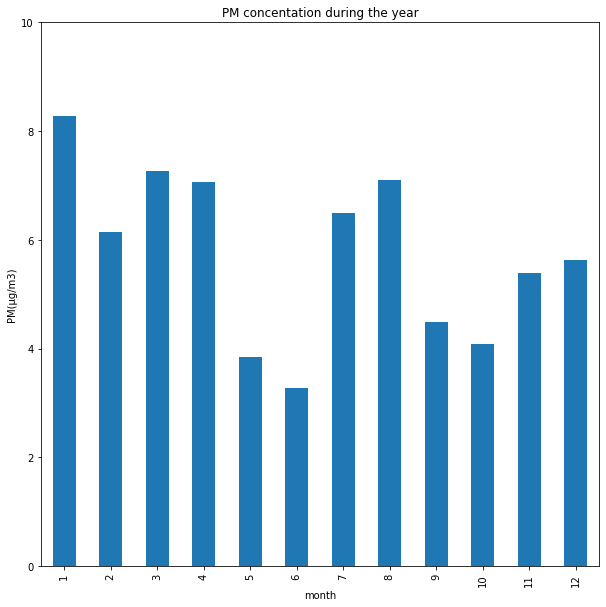

In [14]:
#PM concentration during the year
bar("month","year")

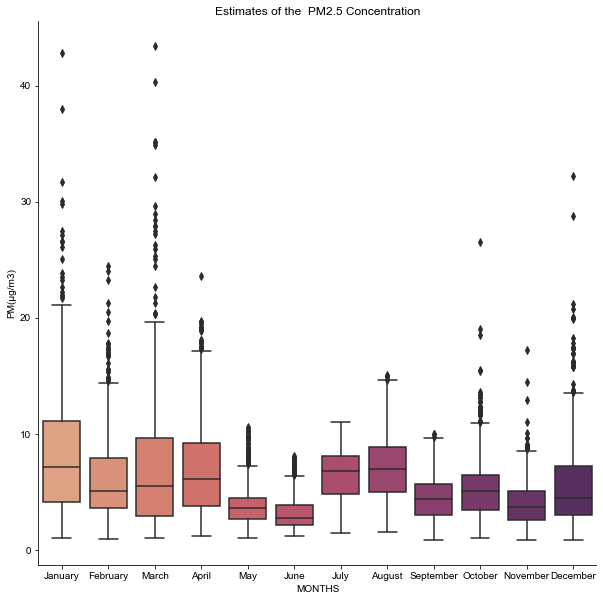

In [15]:
combined_dfs = pd.DataFrame({'January': January['PM2.5'],
                             'February': February['PM2.5'],
                             'March': March['PM2.5'],
                             'April': April['PM2.5'],
                             'May': May['PM2.5'],
                             'June': June['PM2.5'],
                             'July': July['PM2.5'],
                             'August': August['PM2.5'],
                             'September': September['PM2.5'],
                             'October': October['PM2.5'],
                             'November': November['PM2.5'],
                             'December': December['PM2.5'],})
plt.figure(figsize=(10,10))
plt.title("Estimates of the  PM2.5 Concentration")
sns.set_style('white')
plt.xlabel('MONTHS')
plt.ylabel('PM(μg/m3)')
sns.boxplot(data=combined_dfs, palette='flare')
sns.despine()
plt.show()

In [16]:
statistics(data["PM2.5"])

the min value is 0.8557
the max value is 43.45196
the mean value is 5.882247079078079
the standard deviation value is 3.8278516810235


In [43]:
#similarly we can find the statistics for every month
statistics(December["PM2.5"])

the min value is 0.8571
the max value is 32.271805
the mean value is 5.6360266653123
the standard deviation value is 3.906103710988901


# cold and warm period

Text(0.5, 1.0, 'PM concentation during the year for the cold period')

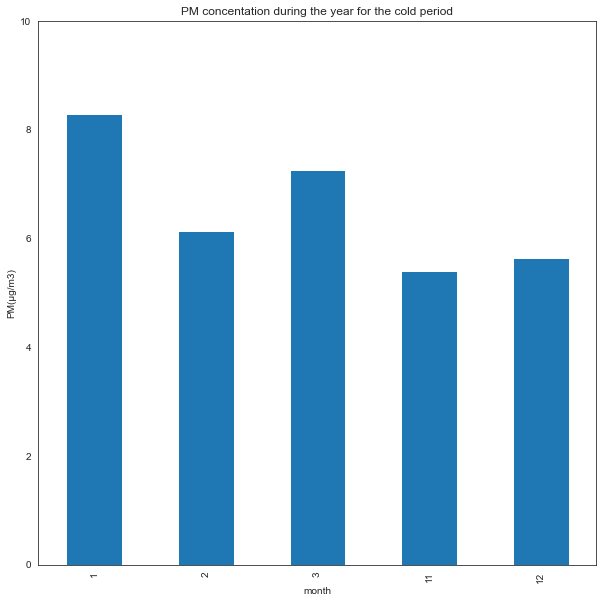

In [18]:
#cold period
plt.figure(figsize=(10,10))
cold.groupby("month")["PM2.5"].mean().plot(kind='bar')
plt.xlabel("month")
plt.ylim(0, 10)
plt.ylabel("PM(μg/m3)")
title = "PM concentation during the year for the cold period"
plt.title(title)

Text(0.5, 1.0, 'PM concentation during the day for the cold period')

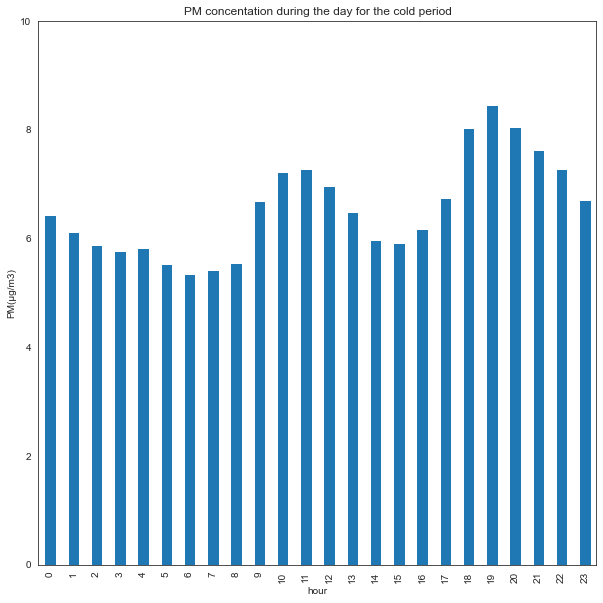

In [19]:
#cold period
plt.figure(figsize=(10,10))
cold.groupby("hour")["PM2.5"].mean().plot(kind='bar')
plt.xlabel("hour")
plt.ylim(0, 10)
plt.ylabel("PM(μg/m3)")
title = "PM concentation during the day for the cold period"
plt.title(title)

In [20]:
statistics(cold["PM2.5"])

the min value is 0.8571
the max value is 43.45196
the mean value is 6.574604061500005
the standard deviation value is 4.68495859263577


Text(0.5, 1.0, 'PM concentation during the year for the warm period')

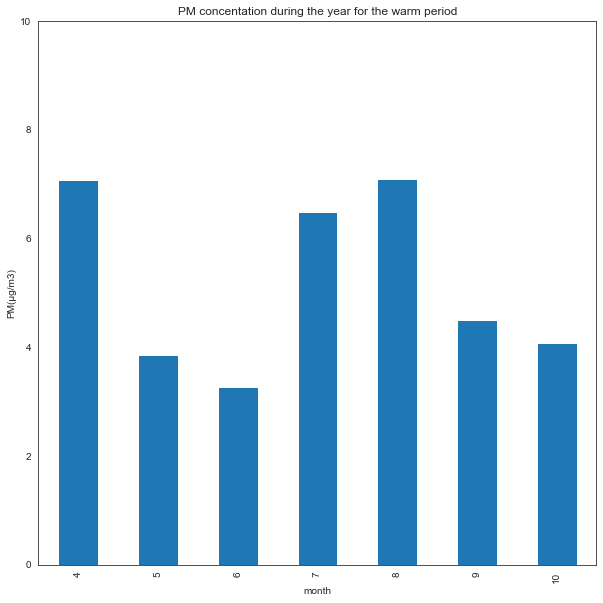

In [21]:
#warm period
plt.figure(figsize=(10,10))
warm.groupby("month")["PM2.5"].mean().plot(kind='bar')
plt.xlabel("month")
plt.ylim(0, 10)
plt.ylabel("PM(μg/m3)")
title = "PM concentation during the year for the warm period"
plt.title(title)

Text(0.5, 1.0, 'PM concentation during the day for the warm period')

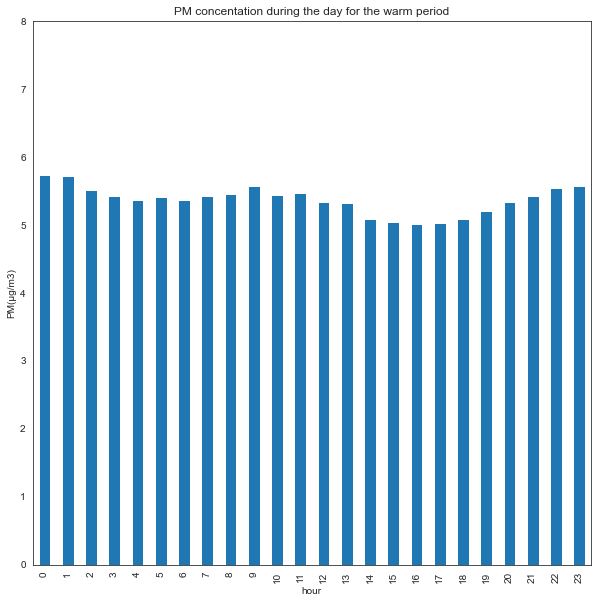

In [22]:
#warm period
plt.figure(figsize=(10,10))
warm.groupby("hour")["PM2.5"].mean().plot(kind='bar')
plt.xlabel("hour")
plt.ylim(0, 8)
plt.ylabel("PM(μg/m3)")
title = "PM concentation during the day for the warm period"
plt.title(title)

In [23]:
statistics(warm["PM2.5"])

the min value is 0.8557
the max value is 23.61571
the mean value is 5.372323696205364
the standard deviation value is 2.943732578400038


# seasons

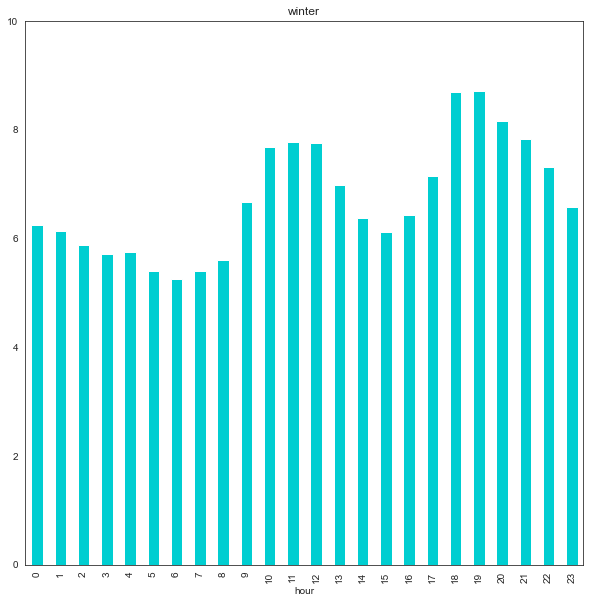

In [24]:
seashour(winter.groupby("hour")["PM2.5"],'darkturquoise','winter')

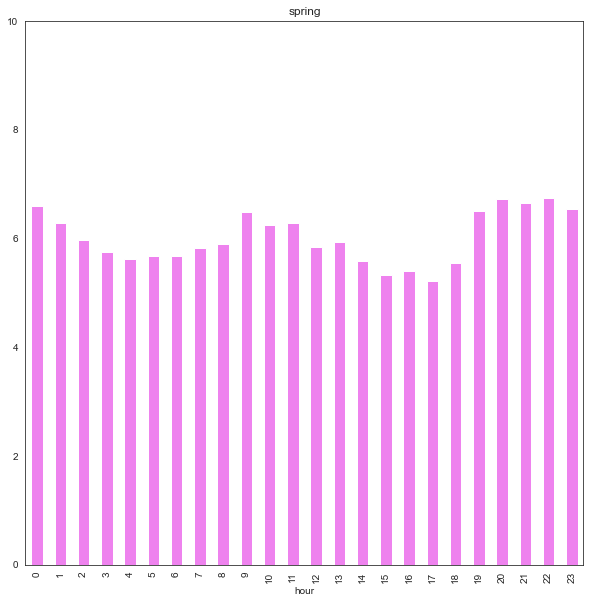

In [25]:
seashour(spring.groupby("hour")["PM2.5"],"violet",'spring')

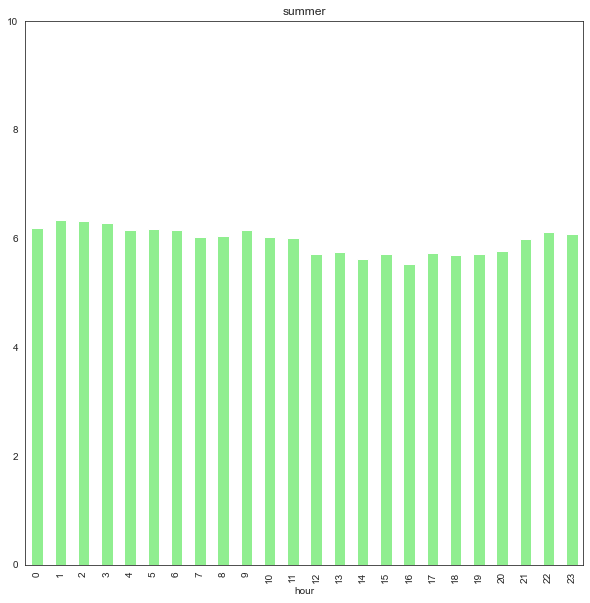

In [26]:
seashour(summer.groupby("hour")["PM2.5"],"lightgreen",'summer')

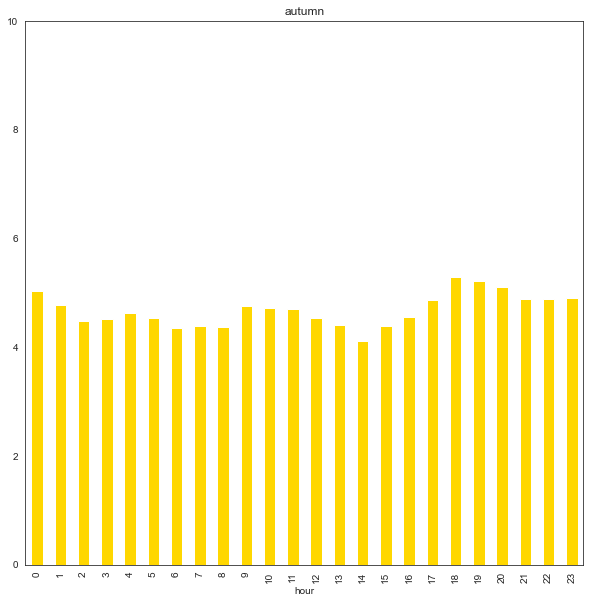

In [27]:
seashour(autumn.groupby("hour")["PM2.5"],"gold",'autumn')

In [28]:
seas = ( np.mean(winter['PM2.5']),
        np.mean(spring["PM2.5"]),
        np.mean(summer["PM2.5"]),
        np.mean(autumn["PM2.5"]))

print(seas)

(6.761964096783457, 6.012980077409018, 5.976413781154376, 4.686355292629667)


<ipython-input-29-387f35ed08f7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


<Figure size 720x720 with 0 Axes>

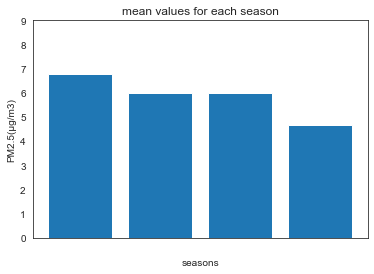

In [29]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

#fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[2] = ' '
labels[4] = ' '

ax.set_xticklabels(labels)
plt.bar(range(0, 4, 1), seas)
plt.ylim(top=9)
plt.xlim()
plt.ylabel('PM2.5(μg/m3)')
plt.xlabel('seasons')
plt.title('mean values for each season')

plt.show()

In [30]:
#seashour(summer.groupby("month")["PM2.5"],"lightgreen",'summer')

In [31]:
#seashour(autumn.groupby("month")["PM2.5"],"gold",'summer')